## Dataset Selection

## Option A: UCI Bank Marketing Dataset

**Domain:** Marketing / Business Analytics

**Description:** This dataset contains records from direct marketing campaigns (phone calls) of a Portuguese banking institution. The goal is to predict whether a client will subscribe to a term deposit. Features include client demographics (age, job, marital status, education), campaign details (contact type, month, duration, number of contacts), and economic indicators.

Include a 3–5 sentence justification in your notebook explaining why you selected your dataset and what aspects interest you analytically

Data Source: https://archive.ics.uci.edu/dataset/222/bank+marketing

Description from Source: 

Dataset Information
Additional Information

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Related paper: https://repositorio.iscte-iul.pt/bitstream/10071/9499/5/dss_v3.pdf

### Chat GPT USAGE: 

**Prompt 1**
I plan to work on the marketing dataset. Before I create my own story to tell, help me give more of an overview about the initial questions authors try to answer, what they used, and what the results

**Interesting finding from response:**
Sub-questions (Based on Table 1 of the paper)
Does the offered interest rate influence the likelihood of a sale?
Does agent gender or experience matter?
Does the client’s financial situation or relationship with the bank matter?
Do call context factors matter? (inbound vs outbound call, previous scheduled calls, etc.)
Do social & economic indicators influence success?
(e.g., employment rate, consumer confidence, Euribor)
Does age or location matter?

Data
52,944 bank telemarketing calls (May 2008–June 2013)
Only 12.38% were successful → highly imbalanced dataset

Top Predictors
3-month Euribor interest rate
Call direction (inbound > outbound)
Agent experience (days working)
Difference between bank’s offered rate & national average
Duration of previously scheduled calls

Lower Euribor correlates with higher likelihood of saving, especially after the 2008 crisis.


## Data cleaning and preprocessing (handling missing values, outliers, normalization)

In [2]:
#Libraries 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv("../data/bank-additional/bank-additional.csv")

In [4]:
df.shape 

(4119, 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                        --------------  ----- 
 0   age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"  4119 non-null   object
dtypes: object(1)
memory usage: 32.3+ KB


In [6]:
df.describe() 

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
count,4119
unique,4119
top,"30;""blue-collar"";""married"";""basic.9y"";""no"";""ye..."
freq,1


Seems like csv file was not reading correctly. Need to fix


In [7]:
df = pd.read_csv("../data/bank-additional/bank-additional.csv", sep=';')

In [8]:
df.shape 

(4119, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

### bank client data:
1 - age (numeric)
  
2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
  
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric) 

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

### related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

### other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

### Additional columns: 

emp.var.rate	Employment change	

cons.price.idx	Inflation level (CPI)	

cons.conf.idx	Consumer confidence 

euribor3m	3-month interest rate	

nr.employed	Total employment level	

Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")



## Exploratory Data Analysis (EDA) with summary statistics and visualizations

In [10]:
df.describe() 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Since Data description suggests that using duration column is almost like cheating (because we want to predict if future call will be successful, but we can't know it from future), I will not use this column

In [11]:
df.eq("unknown").sum()

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64

In [12]:
(df.eq("unknown").mean() * 100).round(2)

age                0.00
job                0.95
marital            0.27
education          4.05
default           19.50
housing            2.55
loan               2.55
contact            0.00
month              0.00
day_of_week        0.00
duration           0.00
campaign           0.00
pdays              0.00
previous           0.00
poutcome           0.00
emp.var.rate       0.00
cons.price.idx     0.00
cons.conf.idx      0.00
euribor3m          0.00
nr.employed        0.00
y                  0.00
dtype: float64

It seems like the "default" column is almost 20% unknown values. I might experiment if it changes the picture significantly if I include/disable this column.

In [13]:
base_dist = df['y'].value_counts(normalize=True) * 100
print(base_dist.round(2))

y
no     89.05
yes    10.95
Name: proportion, dtype: float64


In [14]:
# First DataFrame will no contain "default" column
df1 = df.drop(columns=['default'])
dist_df1 = df1['y'].value_counts(normalize=True) * 100
print("\nAfter removing rows where default=='unknown':")
print(dist_df1.round(2))


After removing rows where default=='unknown':
y
no     89.05
yes    10.95
Name: proportion, dtype: float64


In [15]:
# Second DataFrame I droping rows where default == "unknown"
df2 = df[df['default'] != "unknown"]

#Check how distribution changed 
dist_df2 = df2['y'].value_counts(normalize=True) * 100
print("\nAfter removing rows where default=='unknown':")
print(dist_df2.round(2))


After removing rows where default=='unknown':
y
no     87.88
yes    12.12
Name: proportion, dtype: float64


In [16]:
yes_percent = (df['y'] == "yes").mean() * 100
print("Yes percent:", round(yes_percent, 2))

Yes percent: 10.95


The default variable contains a high percentage of unknown values, also most rows that has value different from "unknown" has "no" value. Removing rows with "unknown" in "default" column significantly change the proportion of customers who subscribe, introducing selection bias.

This is because the variable carries almost no useful signal: default “yes” is rare, default “no” dominates, the model cannot extract patterns from this feature, and the dataset becomes cleaner and more stable when the default column is dropped entirely.

Final Preprocessing steps:

In [17]:
df = pd.read_csv("../data/bank-additional/bank-additional.csv", sep=';')

df_new = df.drop(columns=['duration', 'default'])

# df_new = df_new.replace({'yes': 1, 'no': 0})

df_new.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [18]:
cat_cols = df_new.select_dtypes(include='object').columns
df_new[cat_cols].nunique()

for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df_new[col].unique())


Column: job
['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']

Column: marital
['married' 'single' 'divorced' 'unknown']

Column: education
['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate']

Column: housing
['yes' 'no' 'unknown']

Column: loan
['no' 'unknown' 'yes']

Column: contact
['cellular' 'telephone']

Column: month
['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']

Column: day_of_week
['fri' 'wed' 'mon' 'thu' 'tue']

Column: poutcome
['nonexistent' 'failure' 'success']

Column: y
['no' 'yes']


In [19]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df_new.select_dtypes(include='number').columns
X_numeric = df_new[numeric_cols]
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)
X_cat = pd.get_dummies(df_new[cat_cols], drop_first=True)

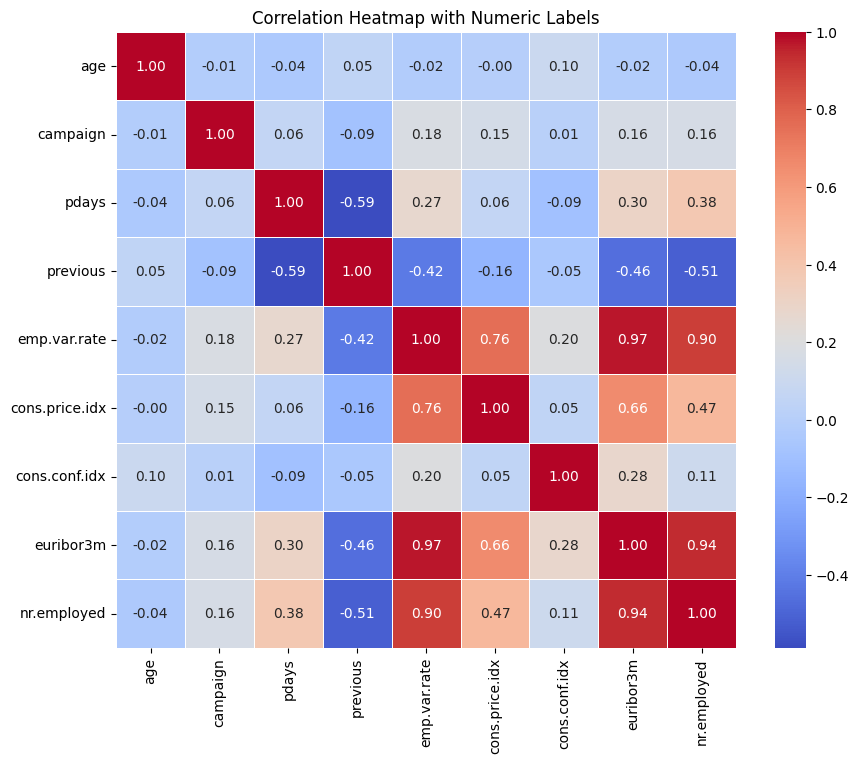

In [20]:
# multicollinearity test 

plt.figure(figsize=(10, 8))
sns.heatmap(
    df[numeric_cols].corr(),
    annot=True,         
    fmt=".2f",          
    cmap="coolwarm", 
    linewidths=0.5
)
plt.title("Correlation Heatmap with Numeric Labels")
plt.show()

In [21]:
categorical_cols = [
    'job', 'marital', 'education', 'contact',
    'month', 'poutcome', 'housing', 'loan'
]

print(df[categorical_cols[0]].value_counts(normalize=True))


job
admin.           0.245691
blue-collar      0.214615
technician       0.167759
services         0.095412
management       0.078660
retired          0.040301
self-employed    0.038602
entrepreneur     0.035931
unemployed       0.026948
housemaid        0.026706
student          0.019908
unknown          0.009468
Name: proportion, dtype: float64


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = df[numeric_cols]
y = df["y"]   # yes / no

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logit", LogisticRegression(
        penalty="l1",
        solver="liblinear",
        max_iter=1000
    ))
])

pipe.fit(X, y)

# Extract selected features
coef = pipe.named_steps["logit"].coef_[0]

selected_features = [
    var for var, c in zip(numeric_cols, coef) if c != 0
]

selected_features


['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [33]:
df[numeric_cols]

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,2,999,0,-1.8,92.893,-46.2,1.313,5099.1
1,39,4,999,0,1.1,93.994,-36.4,4.855,5191.0
2,25,1,999,0,1.4,94.465,-41.8,4.962,5228.1
3,38,3,999,0,1.4,94.465,-41.8,4.959,5228.1
4,47,1,999,0,-0.1,93.200,-42.0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...
4114,30,1,999,0,1.4,93.918,-42.7,4.958,5228.1
4115,39,1,999,0,1.4,93.918,-42.7,4.959,5228.1
4116,27,2,999,1,-1.8,92.893,-46.2,1.354,5099.1
4117,58,1,999,0,1.4,93.444,-36.1,4.966,5228.1


In [23]:
print(df[categorical_cols[1]].value_counts(normalize=True))

marital
married     0.609128
single      0.279922
divorced    0.108279
unknown     0.002671
Name: proportion, dtype: float64


In [24]:
print(df[categorical_cols[2]].value_counts(normalize=True))

education
university.degree      0.306871
high.school            0.223598
basic.9y               0.139354
professional.course    0.129886
basic.4y               0.104151
basic.6y               0.055353
unknown                0.040544
illiterate             0.000243
Name: proportion, dtype: float64


In [25]:
print(df[categorical_cols[3]].value_counts(normalize=True))

contact
cellular     0.643846
telephone    0.356154
Name: proportion, dtype: float64


In [26]:
count = len(df[df[categorical_cols[3]] == "cellular"])
print(count)

2652


In [27]:
count = len(df[df[categorical_cols[3]] == "telephone"])
print(count)

1467


In [28]:
print(df[categorical_cols[4]].value_counts(normalize=True))

month
may    0.334547
jul    0.172615
aug    0.154406
jun    0.128672
nov    0.108279
apr    0.052197
oct    0.016752
sep    0.015538
mar    0.011653
dec    0.005341
Name: proportion, dtype: float64


In [29]:
print(df[categorical_cols[5]].value_counts(normalize=True))

poutcome
nonexistent    0.855305
failure        0.110221
success        0.034474
Name: proportion, dtype: float64


In [30]:
print(df[categorical_cols[6]].value_counts(normalize=True))

housing
yes        0.528041
no         0.446468
unknown    0.025492
Name: proportion, dtype: float64


In [31]:
print(df[categorical_cols[7]].value_counts(normalize=True))

loan
no         0.813061
yes        0.161447
unknown    0.025492
Name: proportion, dtype: float64


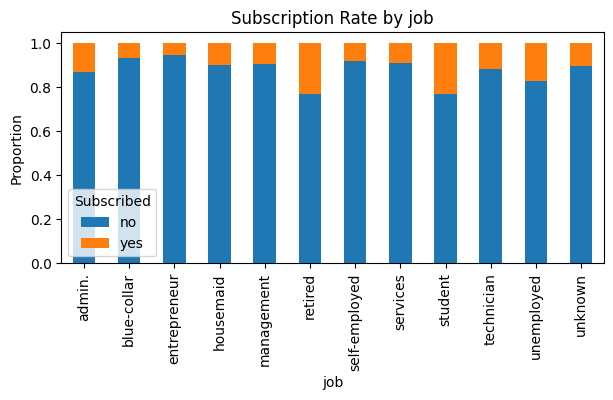

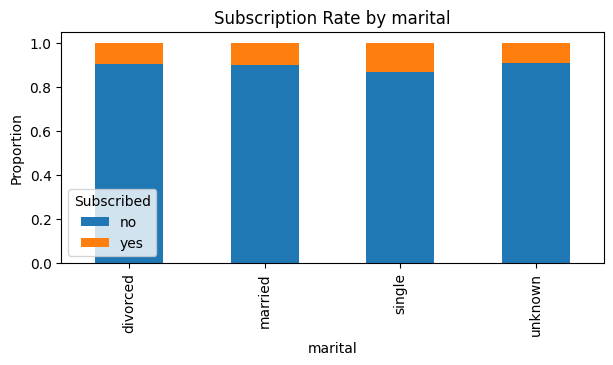

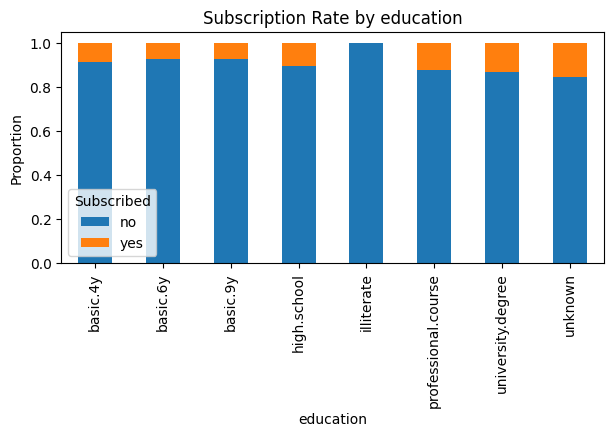

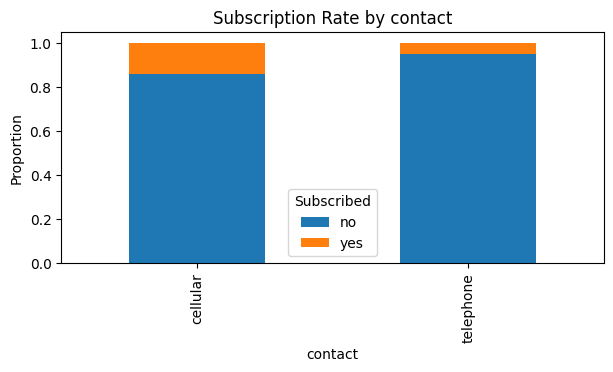

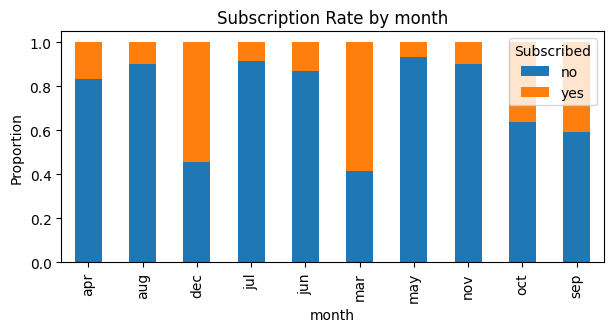

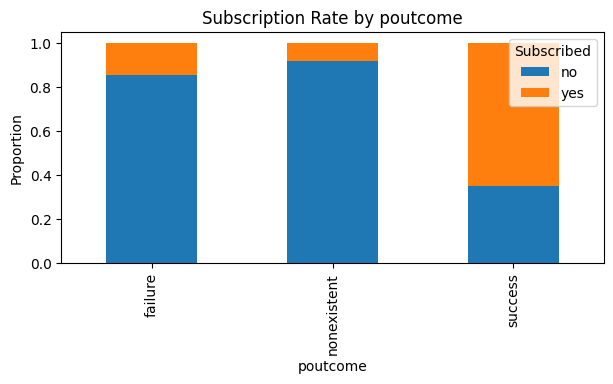

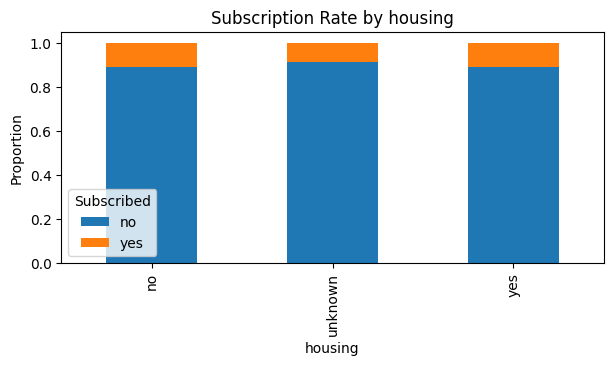

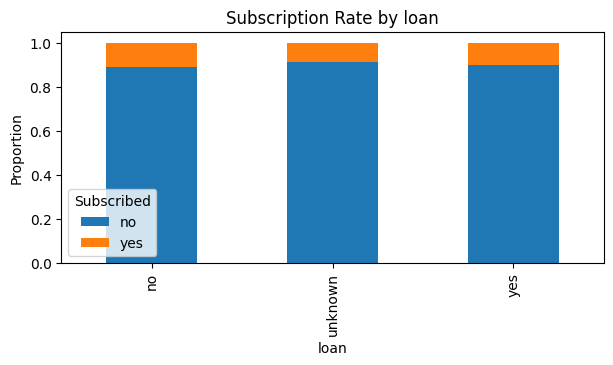

In [32]:
for col in categorical_cols:
    ct = pd.crosstab(df[col], df['y'], normalize='index')
    ct.plot(kind='bar', stacked=True, figsize=(7,3))
    plt.title(f"Subscription Rate by {col}")
    plt.ylabel("Proportion")
    plt.legend(title='Subscribed')
    plt.show()
